In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df = pd.read_excel("D:\#DATA Science\Deep Learning\Deep Learning Practice\islamabad_temperature.xlsx")

In [28]:
df

,Unnamed: 0,daymonth_category,daymonth,weather,max_temp,min_temp,wind,rain,humidity,cloud,pressure,year,weathervalue,avg_temp
0,2020-11-17 11:29:59.787,01/01/2020,01/01/2020,Sunny,18,6,7,0.0,41,12,1024.0,2009,1,12.0
1,2020-11-17 11:30:39.707,01/01/2020,01/01/2020,Sunny,19,4,8,0.0,23,3,1019.0,2010,1,11.5
2,2020-11-17 11:31:16.088,01/01/2020,01/01/2020,Sunny,18,4,7,0.0,38,13,1018.0,2011,1,11.0
3,2020-11-17 11:31:52.926,01/01/2020,01/01/2020,Sunny,14,4,9,0.0,37,4,1023.0,2012,1,9.0
4,2020-11-17 11:32:38.522,01/01/2020,01/01/2020,Sunny,17,6,10,0.0,32,0,1017.0,2013,1,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2020-12-13 19:31:55.464,08/12/2020,08/12/2020,Patchy rain possible,34,25,8,3.5,69,29,1002.0,2010,10,29.5
983,2020-12-13 19:32:11.039,08/12/2020,08/12/2020,Sunny,32,25,9,0.0,68,27,999.0,2011,1,28.5
984,2020-12-13 19:32:26.242,08/12/2020,08/12/2020,Sunny,35,25,5,0.5,45,10,1002.0,2012,1,30.0
985,2020-12-13 19:32:46.982,08/12/2020,08/12/2020,partly cloudy,33,27,7,0.3,67,33,1002.0,2013,7,30.0


In [29]:
df["daymonth"].value_counts()

daymonth
02/06/2020    16
05/01/2020    13
02/18/2020    12
05/06/2020    12
02/05/2020    11
              ..
05/03/2020     4
05/24/2020     3
05/20/2020     3
05/21/2020     2
08/13/2020     1
Name: count, Length: 173, dtype: int64

In [35]:
df = df[["daymonth", "max_temp"]]

In [44]:
df.rename(columns={"max_temp": "Temperature"}, inplace=True)

In [47]:
df['daymonth'].dropna(inplace=True)
df.drop_duplicates(subset="daymonth", inplace=True)

In [48]:
df

,daymonth,Temperature
0,01/01/2020,18
5,01/02/2020,18
11,01/03/2020,15
16,01/04/2020,15
21,01/05/2020,16
...,...,...
966,08/09/2020,42
971,08/10/2020,41
976,08/11/2020,42
981,08/12/2020,42


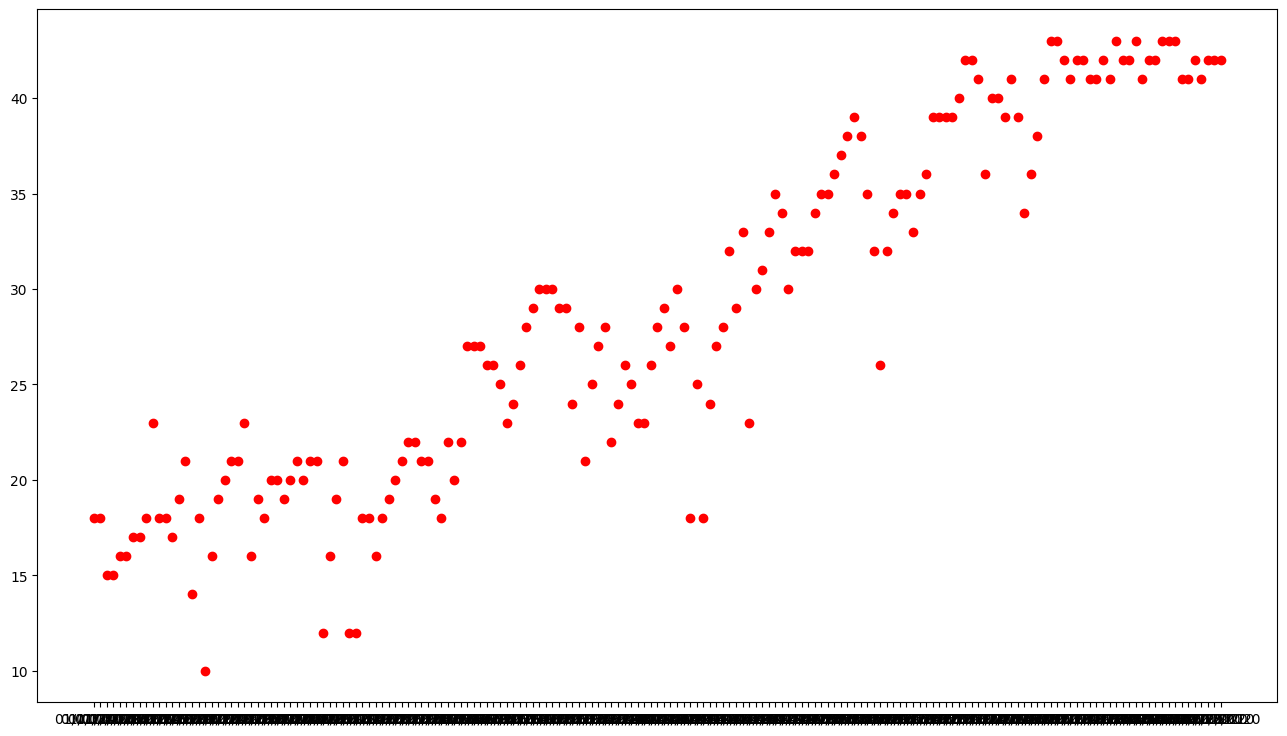

In [52]:
plt.figure(figsize=(16,9))
plt.scatter(x = df["daymonth"], y = df["Temperature"],color = 'red')

In [53]:
x1 = df["Temperature"].ewm(alpha=0.9).mean()
x1

0      18.000000
5      18.000000
11     15.297297
16     15.029703
21     15.902979
         ...    
966    41.901999
971    41.090200
976    41.909020
981    41.990902
986    41.999090
Name: Temperature, Length: 173, dtype: float64

In [54]:
df["EWMA"] = x1

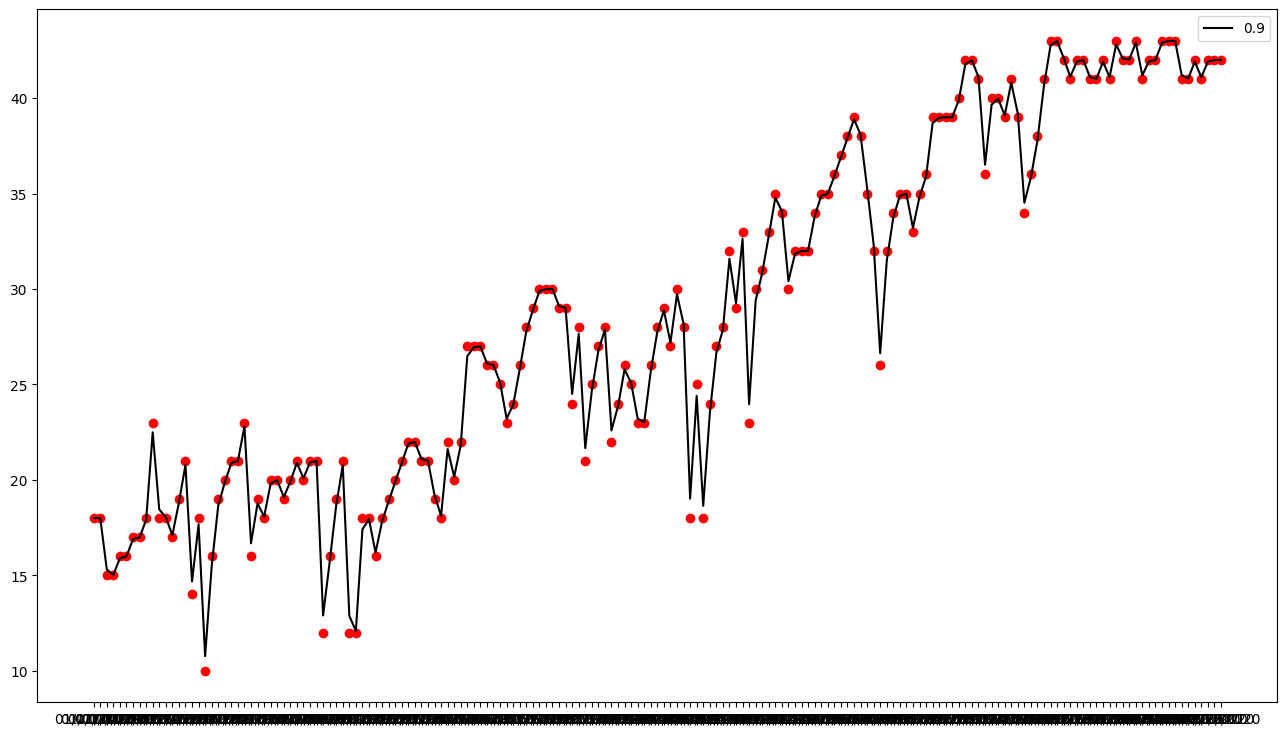

In [55]:
plt.figure(figsize=(16,9))
plt.scatter(x = df["daymonth"], y = df["Temperature"],color = 'red')
plt.plot(df["daymonth"], x1, color = 'black', label = 0.9)
plt.legend()
plt.show()

In [57]:
x1 = df["Temperature"].ewm(alpha=0.5).mean()
x1

0      18.000000
5      18.000000
11     16.285714
16     15.600000
21     15.806452
         ...    
966    41.733436
971    41.366718
976    41.683359
981    41.841679
986    41.920840
Name: Temperature, Length: 173, dtype: float64

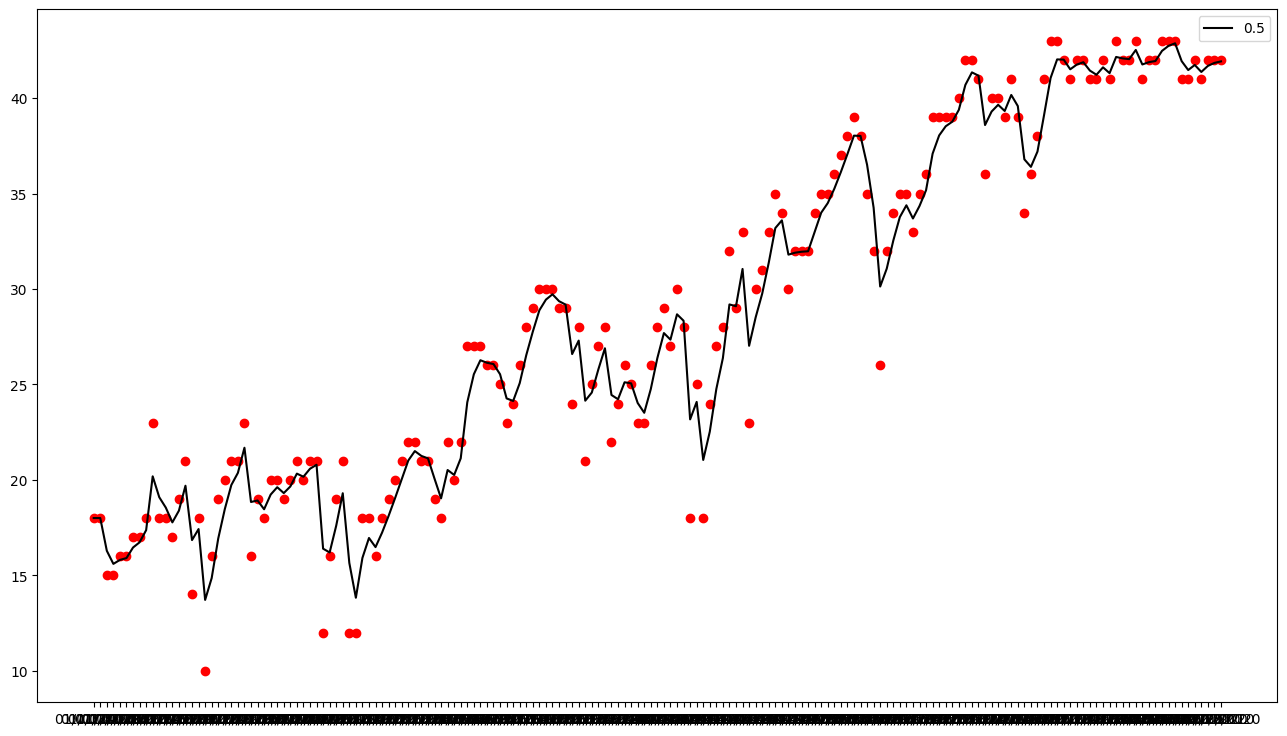

In [58]:
plt.figure(figsize=(16,9))
plt.scatter(x = df["daymonth"], y = df["Temperature"],color = 'red')
plt.plot(df["daymonth"], x1, color = 'black', label = 0.5)
plt.legend()
plt.show()